# Ecuacion de Calor

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
M = 10  # número de filas
L = 20  # número de columnas
dx = 0.1  # tamaño de paso en la dirección x
dy = 0.1  # tamaño de paso en la dirección y
dt = 0.01  # tamaño de paso en el tiempo
T = 1.0  # tiempo total de simulación

In [3]:
# temperatura inicial de la placa
u0 = np.zeros((M, L))
u0[3:7, 7:13] = 10.0  # región central con temperatura inicial de 10 grados

# condiciones de contorno de la placa
# temperatura constante en las fronteras izquierda, derecha, inferior y superior
u0[:, 0] = 0.0
u0[:, -1] = 0.0
u0[0, :] = 0.0
u0[-1, :] = 0.0

In [4]:
k = 1.0  # coeficiente de conductividad térmica
c = 1.0  # capacidad térmica específica
rho = 1.0  # densidad del material

In [5]:
def paso_tiempo(u, dx, dy, dt, k, c, rho):
    # calcular el factor de difusión
    alpha = k / (c * rho)
    # calcular la temperatura en el siguiente paso de tiempo
    u_nuevo = u.copy()
    u_nuevo[1:-1, 1:-1] = u[1:-1, 1:-1] + alpha * dt * (
        (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
        + (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2
    )
    # aplicar condiciones de contorno
    u_nuevo[:, 0] = 0.0
    u_nuevo[:, -1] = 0.0
    u_nuevo[0, :] = 0.0
    u_nuevo[-1, :] = 0.0
    return u_nuevo

In [6]:
def simular_placa(u0, dx, dy, dt, k, c, rho, T):
    # calcular el número de pasos en el tiempo
    n_pasos = int(T / dt)
    
    # inicializar la temperatura de la placa en el tiempo inicial
    u_actual = u0.copy()

    # realizar la simulación en el tiempo especificado
    for n in range(n_pasos):
        # calcular la temperatura en el siguiente paso de tiempo
        u_nuevo = paso_tiempo(u_actual, dx, dy, dt, k, c, rho)
        # actualizar la temperatura actual de la placa
        u_actual = u_nuevo.copy()

    # devolver la temperatura final de la placa
    return u_actual

In [7]:
# simular la placa en el tiempo especificado
u_final = simular_placa(u0, dx, dy, dt, k, c, rho, T)

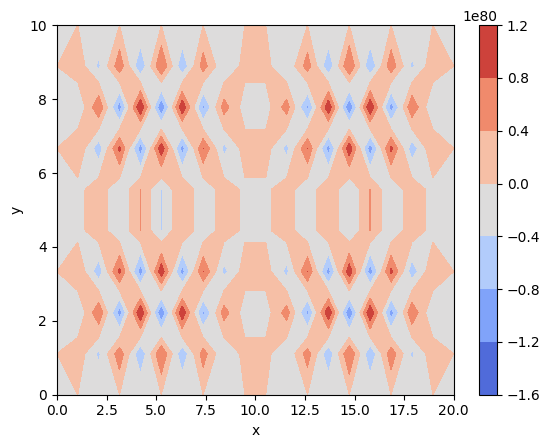

In [8]:
x = np.linspace(0, L, u_final.shape[1])
y = np.linspace(0, M, u_final.shape[0])
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, u_final, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ahora hagamos una animacion

In [10]:
def actualizar_visualizacion(n, u_actual, dx, dy, dt, k, c, rho):
    # calcular la temperatura en el siguiente paso de tiempo
    u_nuevo = paso_tiempo(u_actual, dx, dy, dt, k, c, rho)
    # actualizar la temperatura actual de la placa
    u_actual[:] = u_nuevo
    # actualizar la visualización
    ax.clear()
    ax.contourf(X, Y, u_actual, cmap='coolwarm')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Tiempo: {n*dt:.2f} s')

c:\Users\Det-Pc\anaconda3\envs\pytorch-C-DL\lib\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


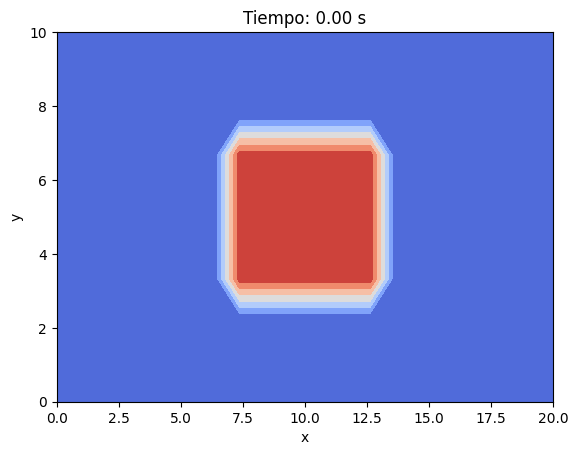

In [13]:
fig, ax = plt.subplots()

# inicializar la temperatura de la placa en el tiempo inicial
u_actual = u0.copy()

# crear la visualización inicial
x = np.linspace(0, L, u_actual.shape[1])
y = np.linspace(0, M, u_actual.shape[0])
X, Y = np.meshgrid(x, y)
ax.contourf(X, Y, u_actual, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Tiempo: 0.00 s')

animacion = animation.FuncAnimation(fig, actualizar_visualizacion,
                                     frames=int(T/dt),
                                     fargs=(u_actual, dx, dy, dt, k, c, rho),
                                     interval=50)
plt.show()